# DTSC 710 Homework 2: Decision Tree, Random Forest Classifier, and Optimization

Selina Narain

ID 1261565

In [620]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier

## Part 1

### a. Using the play tennis dataset found on kaggle. Build a decision tree classifier that can predict whether a person is going to play or not depending on the conditions.

### b. Load dataset, convert string data types to numerics using encoding methods. HINT: Use Label encoder or dummy variables.

In [621]:
# Reading PlayTennis csv file and initializing into dataframe
df = pd.read_csv('/Users/selinanarain/Desktop/DTSC710/HW2/PlayTennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [622]:
# Initialize LabelEncoder for play tennis df
playTennis_le = LabelEncoder()

In [623]:
# Initialize columns
cols = ['outlook', 'temp', 'humidity', 'windy', 'play']

# Encode labels of all columns in df
df[cols] = df[cols].apply(playTennis_le.fit_transform)

# Print df head
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [624]:
# Split dataset in features and target variable
feature_names = ['outlook', 'temp', 'humidity', 'windy']
X = df[feature_names] # Features
y = df.play # Target variable

In [625]:
# Split df into train and test sets 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

### c. Set criterion to "gini"



In [626]:
# Create decision tree classifer object
tennis_clf = DecisionTreeClassifier(criterion="gini")

# Train decision tree classifer
tennis_clf = tennis_clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = tennis_clf.predict(X_test)

In [627]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### d. Visualize the tree. Feel free to use either plot_tree that comes native with sklearn’s Tree package or use graphviz. I personally prefer visualizing using graphviz because it gives a much cleaner output.

In [628]:
# Visualizes using plot_tree
#fig = plt.figure(figsize=(15,10))
#tree.plot_tree(clf)

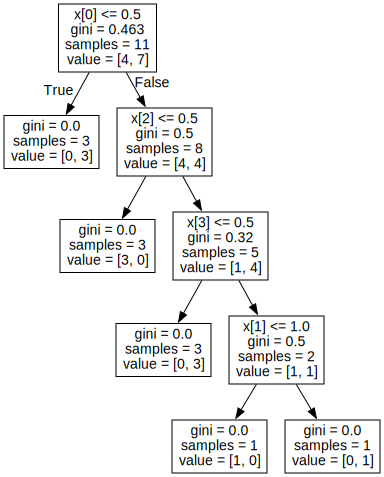

In [629]:
# Visualize tree using graphviz
playTennis_DTdata = tree.export_graphviz(tennis_clf)
graph = graphviz.Source(playTennis_DTdata)
graph

## Part 2

### a. We will use the red wine quality dataset and random forest classifier to classify high quality wines and low quality wines.

In [630]:
# Reading redwinequality csv file and initializing into dataframe
df = pd.read_csv('/Users/selinanarain/Desktop/DTSC710/HW2/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### b.  DATA PREPROCESSING – our target is “quality”. Quality has 6 unique numerical values (3,4,5,6,7,8). This can be confirmed using “df[“quality”].unique()”. We will create three class labels (excellent, decent, bad) from the quality ratings. For quality that are 4 AND below, we will now label that as bad. For quality that are between 5 AND 6, we will now label that as decent. Lastly, for quality that are 7 AND above, we will label that as excellent.

In [631]:
#View unique numerical values in target
arrQual = df["quality"].unique()
arrQual.sort()
print(arrQual)

[3 4 5 6 7 8]


In [632]:
# Create data labels for quality ranges
bins = [0, 4, 6, 10]
labels = ["bad", "decent", "excellent"]
df['quality_type'] = pd.cut(df['quality'], bins=bins, labels=labels)
df
#print(df.loc[36,:])
#print(df.loc[37,:])
#print(df.loc[38,:]) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,decent
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,decent
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,decent
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,decent
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,decent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,decent
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,decent
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,decent
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,decent


### c. convert the now string datatype quality to numeric using encoding method

In [633]:
# Initialize LabelEncoder for wine quality df
quality_le = LabelEncoder()

In [634]:
# Initialize quality column
qualityType_col = ['quality_type']

# Encode labels of quality type column
df[qualityType_col] = df[qualityType_col].apply(quality_le.fit_transform)

# Print df head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### d. GET A BASELINE ACCURACY FOR COMPARISON. Build a random forest classifier using only default values (w/o any hyperparameter tuning).

In [635]:
# Split dataset in features and target variable
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = df[feature_names] # Features
y = df.quality_type # Target variable

In [636]:
# Split df into train and test sets 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [637]:
# Create decision tree classifer object
wine_clf = RandomForestClassifier(n_estimators=100, random_state=1)

# Train decision tree classifer
wine_clf = wine_clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = wine_clf.predict(X_test)

In [638]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.884375


### e. Use the Grid Search algorithm to find the best parameters for our RFC.

In [639]:
# Hyperparameters for grid search
hyperParameter_grid = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
}

rfc = RandomForestClassifier(random_state=1)

# Grid search to find best parameters
grid_search = GridSearchCV(estimator=rfc, param_grid=hyperParameter_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=1)

In [640]:
# Print best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print(grid_search.score(X_test, y_test))

Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8717892156862745
Accuracy: 0.884375


### f. Question: Do you noticed any accuracy improvements on your model? 

Based on the first model in 2d with the default values, the baseline accuracy found is 0.884375. In 2e when running the grid search algorithm with hyperparameters, the accuracy score comes out to be the same (0.884375) but the best score (the average of all cv folds for a single combination of the parameters), is 0.8717892156862745.